## Performing a comparative gender analysis and generating word clouds from the lyrics of female and male rappers in Senegal.

#### These are the Senegalese rappers we will be using to conduct our analyses:

**Women**
 - Jozie
 - Sister LB
 - Mina la voilée 
 - Sister Fa
 - Mamy Victory

**Males**
 - Keurgui group
 - Daaraj family
 - Ngaaka blindé 
 - Didier Awadi
 - Dip Doundou Guiss

### Step 1: Import required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import io
import nltk
from matplotlib import font_manager

### Step 2: Define a function to load CSV from GitHub

In [2]:
def load_lyrics_from_github(raw_url):
    response = requests.get(raw_url).content
    return pd.read_csv(io.StringIO(response.decode('utf-8')))

### Step 3: Load lyrics data for female and male rappers

In [3]:
# Insert the actual RAW CSV URLs

female_csv_url = "https://raw.githubusercontent.com/AWJP/AWJP-data/refs/heads/main/Social%20Issues%20%26%20Human%20Rights/Lyrics%20of%20popular%20Senegal%20female%20rap%20songs%202024.csv"
male_csv_url = "https://raw.githubusercontent.com/AWJP/AWJP-data/refs/heads/main/Social%20Issues%20%26%20Human%20Rights/Lyrics%20of%20popular%20Senegal%20male%20rap%20songs%202024.csv"

female_df = load_lyrics_from_github(female_csv_url)
male_df = load_lyrics_from_github(male_csv_url)

### Step 4: Preview the structure

In [4]:
female_df.head(), male_df.head()

(  Lyrics of the most popular songs of Senegalese female rappers
 0  Sister Fa - Milyamba (English)\n\n1. Verse\nWe...           
 1  Sister LB - maa la dig tekki lyrics english I ...           
 2  ** The lyrics of Mamy Victory "Kouy Feugeuti" ...           ,
   Lyrics of the most popular songs of Senegalese male rappers
 0  Keur Gui - Alma Noop Lyrics\nCliff\nTanale, my...         
 1  Daara J Family - Déloussil Lyrics\n\nDeloussil...         
 2  Blinde Nema Waw Lyrics\n\nAlmost immediately, ...         
 3  The African ft. Baaba Maal - Didier Awadi\n\n....         
 4  I wonder, I wonder, I think\n\n(Straight from ...         )

### Step 5: Combine all lyrics into one string per group

In [5]:
female_text = female_df['Lyrics of the most popular songs of Senegalese female rappers'].dropna().str.cat(sep=' ')
male_text = male_df['Lyrics of the most popular songs of Senegalese male rappers'].dropna().str.cat(sep=' ')

# Clean female and male lyrics text
clean_female_text = " ".join(female_text.split())
clean_male_text = " ".join(male_text.split())

### Step 6: Create a function to generate a word cloud

In [6]:
# Download stopwords once
nltk.download('stopwords')

from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords

def generate_wordcloud(text, title):
    # Combine NLTK and WordCloud default stopwords
    all_stopwords = set(stopwords.words('english')).union(STOPWORDS)
    
    font_path = "/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf"  # Adjust if needed

    cleaned_text = " ".join(text.split())  # Clean extra whitespace

    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        stopwords=all_stopwords,
        font_path=font_path
    ).generate(cleaned_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

[nltk_data] Downloading package stopwords to /home/soila/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Step 7: Generate word clouds for both groups

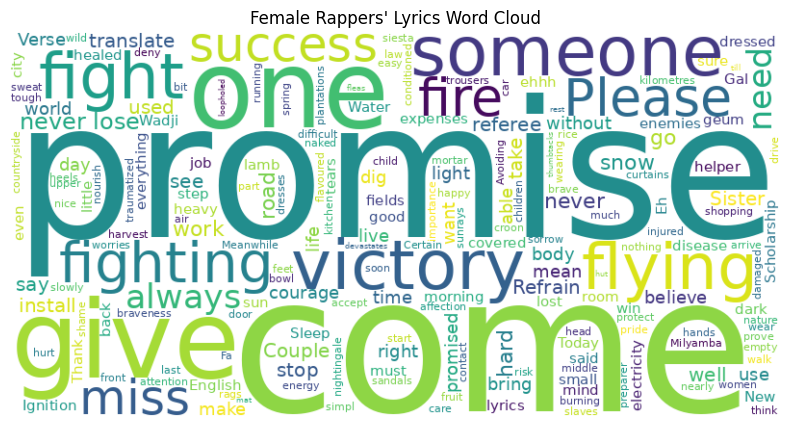

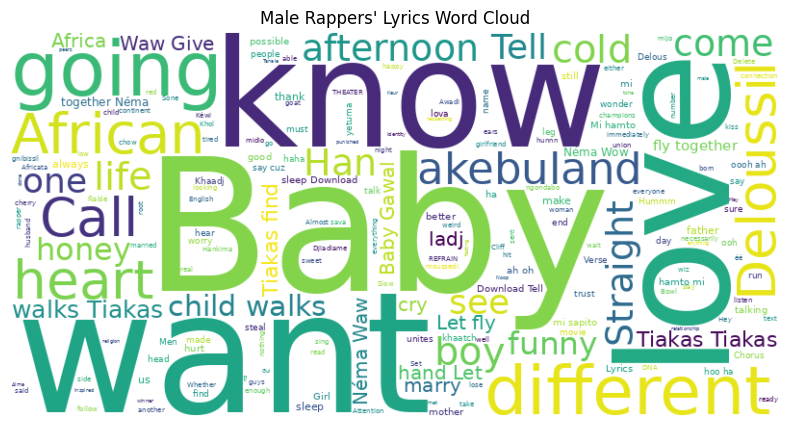

In [7]:
generate_wordcloud(female_text, "Female Rappers' Lyrics Word Cloud")
generate_wordcloud(male_text, "Male Rappers' Lyrics Word Cloud")

### Optional Step 8: Compare top 20 most common words (basic)

In [8]:
from collections import Counter
import re
from nltk.corpus import stopwords

# Define stopwords
stop_words = set(stopwords.words('english'))

# Function to get top N filtered words
def get_top_words(text, n=20):
    words = re.findall(r'\b\w+\b', text.lower())
    filtered_words = [word for word in words if word not in stop_words]
    return Counter(filtered_words).most_common(n)

# Get top 20 filtered words for both groups
female_top_words = get_top_words(female_text)
male_top_words = get_top_words(male_text)

# Print for raw verification (optional)
print("Top words in Female lyrics:")
print(female_top_words)

print("\nTop words in Male lyrics:")
print(male_top_words)

# Format into a side-by-side DataFrame
top_words_df = pd.DataFrame({
    'Female Rappers': [f"{word} ({count})" for word, count in female_top_words],
    'Male Rappers': [f"{word} ({count})" for word, count in male_top_words]
})

top_words_df.index = [f"{i+1}" for i in range(len(top_words_df))]
top_words_df

Top words in Female lyrics:
[('promise', 12), ('come', 12), ('give', 11), ('never', 11), ('one', 10), ('victory', 9), ('someone', 9), ('fight', 8), ('flying', 8), ('fighting', 8), ('please', 7), ('success', 6), ('miss', 6), ('lose', 6), ('always', 6), ('go', 5), ('work', 5), ('hard', 5), ('fire', 5), ('snow', 5)]

Top words in Male lyrics:
[('baby', 25), ('want', 17), ('like', 16), ('mi', 16), ('know', 14), ('love', 14), ('tiakas', 14), ('going', 12), ('let', 12), ('néma', 12), ('different', 12), ('tell', 11), ('african', 11), ('deloussil', 10), ('find', 10), ('heart', 10), ('akebuland', 10), ('sleep', 9), ('child', 9), ('call', 9)]


,Female Rappers,Male Rappers
1,promise (12),baby (25)
2,come (12),want (17)
3,give (11),like (16)
4,never (11),mi (16)
5,one (10),know (14)
6,victory (9),love (14)
7,someone (9),tiakas (14)
8,fight (8),going (12)
9,flying (8),let (12)
10,fighting (8),néma (12)


## Performing a comparative YouTube popularity analysis of male and female Senegalese Rappers.

### Step 1: Import Libraries

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Step 2: Load the CSV Data from GitHub

In [10]:
# Load CSV from GitHub, skip first 2 rows to get correct headers
url = "https://raw.githubusercontent.com/AWJP/AWJP-data/refs/heads/main/Social%20Issues%20%26%20Human%20Rights/YouTube%20Stats%20Female%20and%20Male%20Senegal%20Rappers%20as%20of%205%20August%202024.csv"
df = pd.read_csv(url, skiprows=3)

# Remove any trailing/leading spaces in column names
df.columns = df.columns.str.strip()

### Step 3: Clean and Prepare Data

In [11]:
# Ensure numeric values for analysis
df['YouTube views of most popular song'] = pd.to_numeric(df['YouTube views of most popular song'].str.replace(',', ''), errors='coerce')
df['YouTube likes of most popular song'] = pd.to_numeric(df['YouTube likes of most popular song'].str.replace(',', ''), errors='coerce')
df['YouTube comments of most popular song'] = pd.to_numeric(df['YouTube comments of most popular song'].str.replace(',', ''), errors='coerce')

# Rename for convenience
df = df.rename(columns={
    'YouTube views of most popular song': 'Views',
    'YouTube likes of most popular song': 'Likes',
    'YouTube comments of most popular song': 'Comments'
})

### Step 4: Calculate Averages and Engagement

In [12]:
# Group and compute averages
avg_metrics = df.groupby('Gender').agg({
    'Views': 'mean',
    'Likes': 'mean',
    'Comments': 'mean'
}).round(1)

# Add engagement ratios
avg_metrics['Likes_to_Views'] = (df.groupby('Gender')['Likes'].sum() / df.groupby('Gender')['Views'].sum()).round(4)
avg_metrics['Comments_to_Views'] = (df.groupby('Gender')['Comments'].sum() / df.groupby('Gender')['Views'].sum()).round(4)

avg_metrics

,Views,Likes,Comments,Likes_to_Views,Comments_to_Views
Gender,,,,,
Female,55660.0,2079.2,225.6,0.0374,0.0041
Male,4795800.0,41360.0,2006.6,0.0086,0.0004


### Step 5: Visualize the Metrics (Log-Scale Grouped Bar Chart)

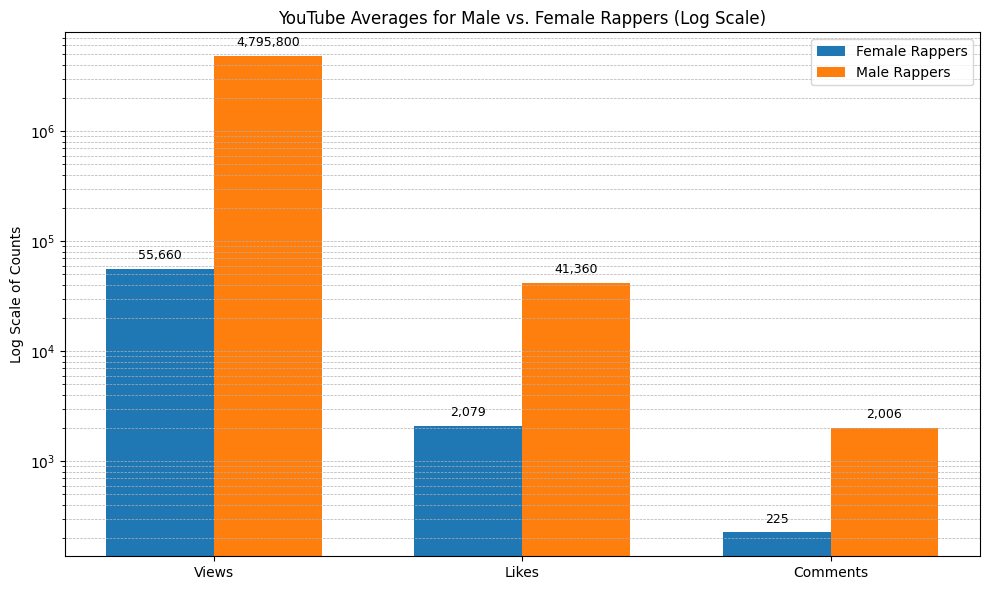

In [13]:
# Prepare data
categories = ['Views', 'Likes', 'Comments']
female_values = avg_metrics.loc['Female', categories].values
male_values = avg_metrics.loc['Male', categories].values

x = np.arange(len(categories))  # label locations
width = 0.35  # width of the bars

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, female_values, width, label='Female Rappers')
bars2 = ax.bar(x + width/2, male_values, width, label='Male Rappers')

# Set log scale
ax.set_yscale('log')
ax.set_ylabel('Log Scale of Counts')
ax.set_title('YouTube Averages for Male vs. Female Rappers (Log Scale)')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()
ax.grid(axis='y', which='both', linestyle='--', linewidth=0.5)

# Annotate bars
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{int(height):,}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=9, color='black')

plt.tight_layout()
plt.show()

# Interpretation

### Comparisons Between Male and Female Rappers

 - **Views:** Male rappers, on average, have significantly higher view counts (4,795,800) compared to female rappers (55,660). This indicates a much larger audience reach for male rappers.
 - **Likes:** The average number of likes is also higher for male rappers (41,360) than for female rappers (2,079.2).
 - **Comments:** Male rappers receive more comments on average (2,006.6) compared to female rappers (225.6).

#### Engagement Ratios

 - **Likes to Views Ratio:** Female rappers have a higher ratio (0.0374) compared to male rappers (0.0086). This suggests that, relative to their view counts, female rappers receive more likes, potentially indicating stronger engagement or a more dedicated fan base.
 - **Comments to Views Ratio:** Female rappers also have a higher comments-to-views ratio (0.0041) compared to male rappers (0.0004), indicating a higher level of interaction.

These differences may also reflect disparities in visibility, platform support, or audience exposure.

### Lyrics

While the frequently used words in the men's lyrics are more skewed towards romance (love, baby, heart), the keywords used in the women's music are often linked to promise, combat, victory and work.


## Conclusion

While male rappers in Senegal generally have higher view counts and overall engagement numbers, female rappers exhibit higher engagement ratios relative to their view counts. This suggests that female rappers, despite having a smaller audience, may have a more engaged and active fan base. The disparities in total views and engagements also reflect broader visibility and possibly accessibility differences between male and female artists. 


***Read the stories AWJP Fellow Aïssatou Bâ wrote that incorporated this analysis: [Part 1](https://aps.sn/rap-galsen-lengagement-des-pionnieres-pour-la-cause-des-femmes-et-des-enfants/) & [Part 2](https://aps.sn/rap-feminin-briser-le-plafond-de-verre/)***